In [159]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
import cv2

plt.rcParams["figure.figsize"] = (12,8)

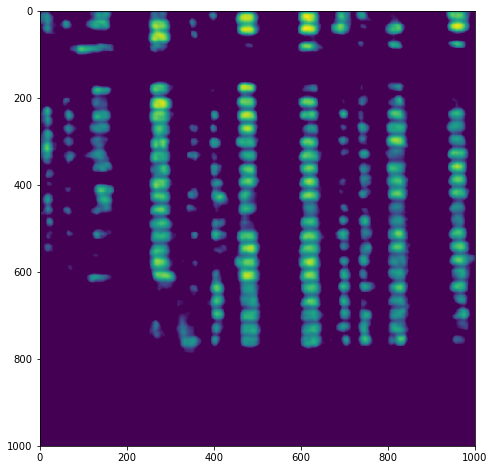

In [199]:
im = PIL.Image.open('chi1_source.tif')
im = np.array(im)
plt.imshow(im)
plt.show()

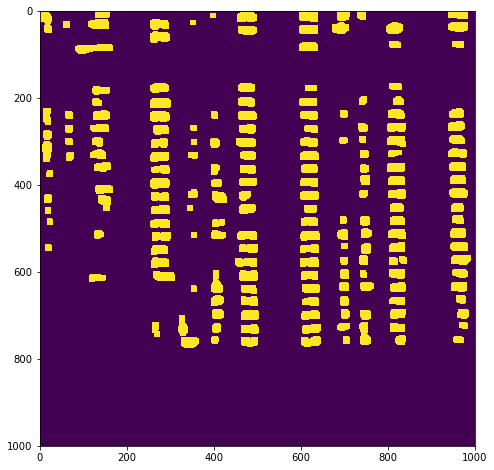

In [201]:
ada = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,51,0)
ada = cv2.morphologyEx(ada,cv2.MORPH_OPEN,np.ones((13,13),dtype=np.uint8))
plt.imshow(ada)
plt.show()


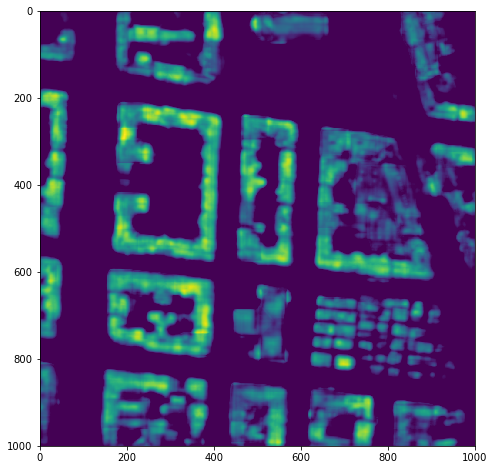

In [196]:
top = cv2.morphologyEx(im,cv2.MORPH_TOPHAT,np.ones((50,50),dtype=np.uint8))
plt.imshow(top)
plt.show()

In [197]:
top

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(1000, 1000)
Number of objects is 98 


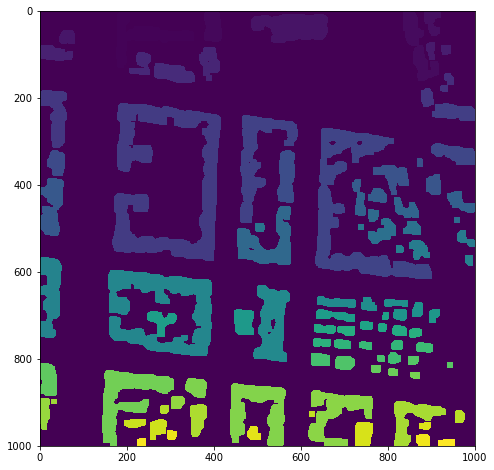

In [198]:
import scipy
from scipy import ndimage
# fname='index.png'
blur_radius = 0
threshold = 1


img = ada.copy() # gray-scale image
print(img.shape)

# smooth the image (to remove small objects)
imgf = ndimage.gaussian_filter(img, blur_radius)
threshold = 0.1

# find connected components
labeled, nr_objects = ndimage.label(imgf > threshold) 
print ("Number of objects is %d " % nr_objects)

# plt.imsave('/tmp/out.png', labeled)
plt.imshow(labeled)
plt.show()